# Capstone Project - Collision severity detection
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to determine traffic collisions severity and probability. Specifically, this report will be targeted to transportation and logistics companies, people who travel by car, taxi drivers, ordinary car drivers who live in Washington district.

We will use the most appropriate mashine learning models to calculate collisions severity based on weather,road conditions, light conditions,collisions type and location. The most accurate math model will be selected.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence severity collisions:
* adress type of collision
* weather, road and light conditions
* collision type

Following data sources will be needed to extract/generate the required information:
* All data about factors listed above will be extracted from ArcGIS Metadata Form 'Collisions—All Years'

Let's download the dataset into workin directory

In [94]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-19 07:09:10--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  19.0MB/s    in 4.2s    

2020-08-19 07:09:15 (16.8 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



The next step is import of necessary python libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


Let's read the dataset

In [2]:
df=pd.read_csv('Data-Collisions.csv')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.head()

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,...,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,0
1,1,-122.347294,47.647172,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,0,0,0
2,1,-122.334540,47.607871,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,...,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,0
3,1,-122.334803,47.604803,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,...,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,0,0,0
4,2,-122.306426,47.545739,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,...,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,0


In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

let's check null values in every colomn

In [12]:
mis=df.isnull()
for column in mis.columns.values.tolist():
    print(column)
    print (mis[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

As we see some columns have null values. We should remove them from our dataset

In [3]:
df.dropna(subset=["X",'ADDRTYPE','LOCATION','ST_COLDESC','ST_COLCODE','LIGHTCOND','ROADCOND','WEATHER','UNDERINFL','JUNCTIONTYPE','COLLISIONTYPE','INATTENTIONIND'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Now we make shure that the dataset doesn't contain null values anymore

In [16]:
mis=df.isnull()
for column in mis.columns.values.tolist():
    print(column)
    print (mis[column].value_counts())
    print("")

SEVERITYCODE
False    28791
Name: SEVERITYCODE, dtype: int64

X
False    28791
Name: X, dtype: int64

Y
False    28791
Name: Y, dtype: int64

OBJECTID
False    28791
Name: OBJECTID, dtype: int64

INCKEY
False    28791
Name: INCKEY, dtype: int64

COLDETKEY
False    28791
Name: COLDETKEY, dtype: int64

REPORTNO
False    28791
Name: REPORTNO, dtype: int64

STATUS
False    28791
Name: STATUS, dtype: int64

ADDRTYPE
False    28791
Name: ADDRTYPE, dtype: int64

INTKEY
True     21375
False     7416
Name: INTKEY, dtype: int64

LOCATION
False    28791
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
False    16818
True     11973
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     28565
False      226
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    28791
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    28791
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    28791
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    28791
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
Fa

When everything looks good let's consider values in every meaningful column

In [17]:
df['SEVERITYCODE'].value_counts()

1    18625
2    10166
Name: SEVERITYCODE, dtype: int64

In [18]:
df['ADDRTYPE'].value_counts()

Block           21375
Intersection     7416
Name: ADDRTYPE, dtype: int64

In [19]:
df['COLLISIONTYPE'].value_counts()

Rear Ended    10341
Parked Car     5974
Angles         3480
Sideswipe      2720
Other          2627
Left Turn      1144
Pedestrian      947
Cycles          866
Right Turn      472
Head On         220
Name: COLLISIONTYPE, dtype: int64

In [20]:
df['PERSONCOUNT'].value_counts()

2     15659
3      6675
4      2742
5      1346
1      1322
6       555
7       244
8        91
9        51
0        35
10       24
11       17
19        4
15        3
14        3
13        3
47        2
27        2
12        2
32        2
44        2
29        1
16        1
26        1
37        1
53        1
22        1
28        1
Name: PERSONCOUNT, dtype: int64

In [21]:
df['PEDCOUNT'].value_counts()

0    27800
1      953
2       32
3        6
Name: PEDCOUNT, dtype: int64

In [22]:
df['PEDCYLCOUNT'].value_counts()

0    27913
1      874
2        4
Name: PEDCYLCOUNT, dtype: int64

In [23]:
df['VEHCOUNT'].value_counts()

2    21700
1     3384
3     3043
4      539
5       85
6       19
0       15
7        4
9        1
8        1
Name: VEHCOUNT, dtype: int64

In [24]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              14611
At Intersection (intersection related)                6993
Mid-Block (but intersection related)                  5253
Driveway Junction                                     1474
At Intersection (but not related to intersection)      421
Ramp Junction                                           39
Name: JUNCTIONTYPE, dtype: int64

In [25]:
df['INATTENTIONIND'].value_counts()

Y    28791
Name: INATTENTIONIND, dtype: int64

In [26]:
df['UNDERINFL'].value_counts()

N    19034
0     8766
Y      619
1      372
Name: UNDERINFL, dtype: int64

In [27]:
df['WEATHER'].value_counts()

Clear                       18811
Raining                      4681
Overcast                     4496
Unknown                       575
Fog/Smog/Smoke                102
Other                          57
Snowing                        52
Sleet/Hail/Freezing Rain        8
Blowing Sand/Dirt               5
Severe Crosswind                4
Name: WEATHER, dtype: int64

In [28]:
df['ROADCOND'].value_counts()

Dry               21099
Wet                6888
Unknown             629
Ice                  73
Snow/Slush           70
Standing Water       16
Other                10
Oil                   3
Sand/Mud/Dirt         3
Name: ROADCOND, dtype: int64

In [29]:
df['LIGHTCOND'].value_counts()

Daylight                    20583
Dark - Street Lights On      6110
Dusk                          839
Unknown                       505
Dawn                          398
Dark - Street Lights Off      172
Dark - No Street Lights       170
Other                          14
Name: LIGHTCOND, dtype: int64

In [30]:
df['HITPARKEDCAR'].value_counts()

N    27695
Y     1096
Name: HITPARKEDCAR, dtype: int64

In [32]:
df['PEDROWNOTGRNT'].value_counts()

Y    427
Name: PEDROWNOTGRNT, dtype: int64

In [33]:
df['SPEEDING'].value_counts()

Y    660
Name: SPEEDING, dtype: int64

After all we adjust values in our columns, drop 'Unknown' values,and convert into appropriate data type. Also we remove columns with duplicate values and useless data

In [4]:
df['HITPARKEDCAR'].replace(['Y','N'],[1,0], inplace=True)
df['PEDROWNOTGRNT'].replace(['Y','N'],[1,0], inplace=True)
df['SPEEDING'].replace(['Y','N'],[1,0], inplace=True)
df.drop(columns=['INTKEY','SDOTCOLNUM','SEVERITYCODE.1','EXCEPTRSNDESC','EXCEPTRSNCODE','OBJECTID'],inplace=True)
df.drop(df[df.LIGHTCOND=='Unknown'].index, inplace=True)
df.drop(df[df.ROADCOND=='Unknown'].index,inplace=True)
df.drop(df[df.WEATHER=='Unknown'].index, inplace=True) 
df.drop(df[df.JUNCTIONTYPE=='Unknown'].index, inplace=True)
df['UNDERINFL'].replace(['Y','N'],[1,0], inplace=True)
df['INATTENTIONIND'].replace(['Y','N'],[1,0], inplace=True)
df['UNDERINFL']=df['UNDERINFL'].astype(int)

df.reset_index(drop=True, inplace=True)


Now let's check shape of our dataset

In [5]:
df.shape

(27908, 32)

In [37]:
df['SEVERITYCODE'].value_counts()

1    17861
2    10047
Name: SEVERITYCODE, dtype: int64

The final data set includes 27908 observations and 32 attributes


The next step is binning of continuous variables

Low       16280
Medium    11174
High        445
Name: PERSONCOUNT-binned, dtype: int64

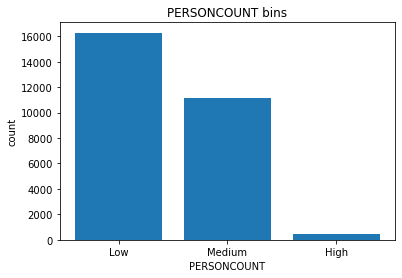

In [36]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

cut_bins=[-1,2,6,28]
group_names = ['Low', 'Medium', 'High']

df['PERSONCOUNT-binned'] = pd.cut(df['PERSONCOUNT'], bins=cut_bins, labels=group_names, include_lowest=True )
df['PERSONCOUNT-binned'].value_counts()
plt.pyplot.bar(group_names,df['PERSONCOUNT-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("PERSONCOUNT")
plt.pyplot.ylabel("count")
plt.pyplot.title("PERSONCOUNT bins")
df['PERSONCOUNT-binned'].value_counts()


As shown above the most number of collisions involve no one or 1 person

None    26935
low       935
High       32
Name: PEDCOUNT-binned, dtype: int64

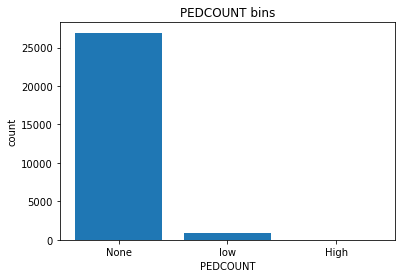

In [35]:
cut_bins=[-1,0,1,2]
bins
group_names = ['None', 'low', 'High']
df['PEDCOUNT-binned'] = pd.cut(df['PEDCOUNT'], bins=cut_bins, labels=group_names, include_lowest=True)
plt.pyplot.bar(group_names, df['PEDCOUNT-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("PEDCOUNT")
plt.pyplot.ylabel("count")
plt.pyplot.title("PEDCOUNT bins")

df['PEDCOUNT-binned'].value_counts()


As we see pedestrians mostly were not involved in collisions

None    27048
low       856
High        4
Name: PEDCYLCOUNT-binned, dtype: int64

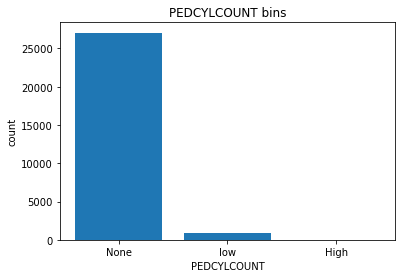

In [37]:
cut_bins=[-1,0,1,2]
group_names = ['None', 'low', 'High']
df['PEDCYLCOUNT-binned'] = pd.cut(df['PEDCYLCOUNT'], bins=cut_bins, labels=group_names, include_lowest=True)
plt.pyplot.bar(group_names, df['PEDCYLCOUNT-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("PEDCYLCOUNT")
plt.pyplot.ylabel("count")
plt.pyplot.title("PEDCYLCOUNT bins")

df['PEDCYLCOUNT-binned'].value_counts()


Bicycles as well were not involved in majority of collisions

None    24258
low      3540
High      110
Name: VEHCOUNT-binned, dtype: int64

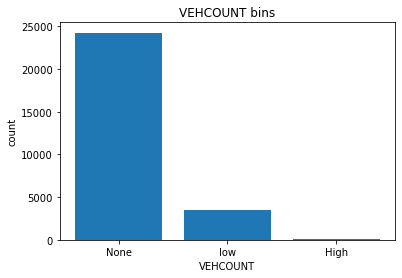

In [39]:
cut_bins=[-1,2,4,9]
group_names = ['None', 'low', 'High']
df['VEHCOUNT-binned'] = pd.cut(df['VEHCOUNT'], bins=cut_bins, labels=group_names, include_lowest=True)
plt.pyplot.bar(group_names, df['VEHCOUNT-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("VEHCOUNT")
plt.pyplot.ylabel("count")
plt.pyplot.title("VEHCOUNT bins")

df['VEHCOUNT-binned'].value_counts()



From the bar diagram plotted above we see that most of vehicles were not involved in collisions or only one vehicle was involved, 13% collision cases involve 2-3 vehicles and only 0.4% collision cases involve 4 and more vehicles

Below is description of the dataset including 'object' type of data 

In [6]:
df.describe(include='object')

,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC
count,27908,27908,27908,27908,27908,27908,27908,27908,27908,27908,27908,27908,27908,27908,27908
unique,27907,1,2,10299,2,10,5585,25753,6,29,9,8,7,98,55
top,1782439,Matched,Block,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,Property Damage Only Collision,Rear Ended,2014/11/21 00:00:00+00,9/2/2004,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Clear,Dry,Daylight,14,From same direction - both going straight - on...
freq,2,27908,20606,56,17861,10136,22,12,14011,13216,18659,20932,20363,5777,8242


## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting collisions severity in Seattle WA USA, taking into account weather, road and light conditions, collicions and adress types.

In first step we have collected the required **data: severity of some types of collisions occured between 2004 and 2015 years at different weather conditions on intersections and blocks.**

Second step in our analysis will be calculation correlation between continuous variables and collision sevserity, categorical variables and collision sevserity. Also we consider relations between different variables and choose features for mashine leraning models. 

In third and final step we will focus on choosing mashine learning models to predict collisions severity and probability. We'll consider the next classification algorithms: **Decision Tree, K-Nearest neighbors, Logistic regression, Support Vector mashine**. Then we'll evaluate them and choose the most accurate model. Also we calculate collisions probability with the help of all models listed above and evaluate their prediction accuracy.

## Analysis <a name="analysis"></a>

In [42]:
from scipy import stats


Let's consider data distribution on the example of collision type and person count deistribution 

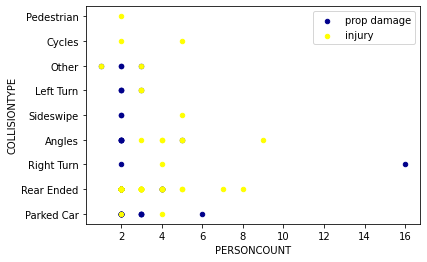

In [49]:
ax = df[df['SEVERITYCODE'] == 1][0:50].plot(kind='scatter', x='PERSONCOUNT', y='COLLISIONTYPE', color='DarkBlue', label='prop damage');
df[df['SEVERITYCODE'] == 2][0:50].plot(kind='scatter', x='PERSONCOUNT', y='COLLISIONTYPE', color='Yellow', label='injury', ax=ax);
plt.show()

As we see our data has non linear distribution.

Now we may see relations between categorical variables.

In [7]:
df1=df.loc[df['SEVERITYCODE']==2,['LIGHTCOND','COLLISIONTYPE','SEVERITYCODE']]
df1

grouped_test1 = df1.groupby(['COLLISIONTYPE','LIGHTCOND'],as_index=False).count()
grouped_test1
grouped_test1['SEVERITYCODE'].sum()

10047

In [9]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

SEVERITYCODE                           \
LIGHTCOND     Dark - No Street Lights Dark - Street Lights Off   
COLLISIONTYPE                                                    
Angles                            5.0                     15.0   
Cycles                            3.0                      6.0   
Head On                           3.0                      1.0   
Left Turn                         1.0                      3.0   
Other                             9.0                      5.0   
Parked Car                        6.0                      1.0   
Pedestrian                        6.0                      4.0   
Rear Ended                       16.0                     15.0   
Right Turn                        0.0                      1.0   
Sideswipe                         2.0                      3.0   

                                                                   
LIGHTCOND     Dark - Street Lights On  Dawn Daylight   Dusk Other  
COLLISIONTYPE                                                      
Angles                          246.0  18.0    950.0   49.0   0.0  
Cycles                          127.0  21.0    571.0   27.0   0.0  
Head On                          29.0   0.0     61.0    3.0   0.0  
Left Turn                       123.0   9.0    297.0   17.0   0.0  
Other                           218.0  10.0    416.0   21.0   0.0  
Parked Car                      184.0  16.0    357.0   15.0   0.0  
Pedestrian                      240.0  23.0    538.0   29.0   1.0  
Rear Ended                      833.0  46.0   3799.0  149.0   3.0  
Right Turn                       17.0   1.0     81.0    4.0   0.0  
Sideswipe                        67.0   6.0    306.0   14.0   0.0

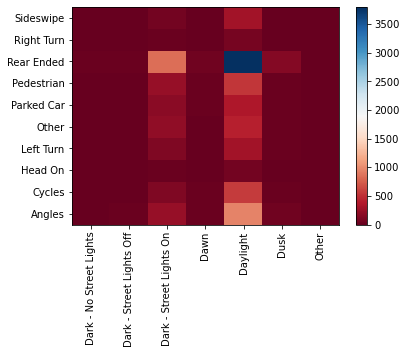

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()




The graph plotted above shows number of injuries at light conditions and different collision types.

So we see that the most of collisions(in this case sevserity of collision is 2) occure at daylight and with Rear ended collision type

In [10]:
df2=df.loc[df['SEVERITYCODE']==1,['LIGHTCOND','COLLISIONTYPE','SEVERITYCODE']]

grouped_test2 = df2.groupby(['COLLISIONTYPE','LIGHTCOND'],as_index=False).count()
grouped_pivot1 = grouped_test2.pivot(index='COLLISIONTYPE',columns='LIGHTCOND')
grouped_pivot1 = grouped_pivot1.fillna(0) #fill missing values with 0
grouped_pivot1
grouped_test2['SEVERITYCODE'].sum()

17861

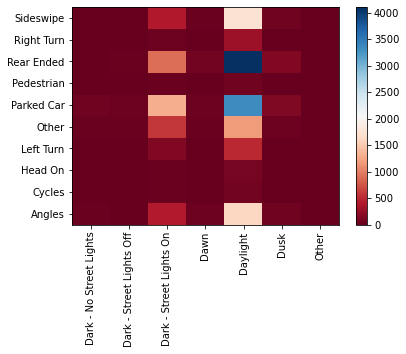

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot1, cmap='RdBu')

#label names
row_labels = grouped_pivot1.columns.levels[1]
col_labels = grouped_pivot1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


The graph plotted above shows number of property damages at light conditions and different collision types.

So we see that most of collisions(in this case sevserity of collision is 1) occure at daylight and with Rear ended collision type. Also damage of parked car is quite high.

In [12]:
df3=df.loc[df['SEVERITYCODE']==1,['WEATHER','COLLISIONTYPE','SEVERITYCODE']]

grouped_test3 = df3.groupby(['COLLISIONTYPE','WEATHER'],as_index=False).count()
grouped_pivot2 = grouped_test3.pivot(index='COLLISIONTYPE',columns='WEATHER')
grouped_pivot2 = grouped_pivot2.fillna(0) #fill missing values with 0
grouped_pivot2

SEVERITYCODE                                                \
WEATHER       Blowing Sand/Dirt   Clear Fog/Smog/Smoke Other Overcast Raining   
COLLISIONTYPE                                                                   
Angles                      0.0  1357.0           10.0   1.0    382.0   404.0   
Cycles                      0.0    71.0            1.0   0.0     16.0     5.0   
Head On                     0.0    62.0            0.0   1.0     27.0    27.0   
Left Turn                   0.0   457.0            1.0   0.0     97.0   120.0   
Other                       1.0  1157.0           12.0   1.0    338.0   386.0   
Parked Car                  0.0  3504.0           13.0   5.0    775.0   616.0   
Pedestrian                  0.0    56.0            1.0   1.0     10.0    21.0   
Rear Ended                  2.0  3433.0           19.0   3.0    792.0  1016.0   
Right Turn                  0.0   242.0            2.0   0.0     71.0    40.0   
Sideswipe                   1.0  1511.0            7.0   4.0    375.0   362.0   

                                                                 
WEATHER       Severe Crosswind Sleet/Hail/Freezing Rain Snowing  
COLLISIONTYPE                                                    
Angles                     0.0                      2.0     5.0  
Cycles                     0.0                      0.0     0.0  
Head On                    0.0                      0.0     1.0  
Left Turn                  0.0                      0.0     1.0  
Other                      0.0                      2.0     3.0  
Parked Car                 1.0                      2.0    14.0  
Pedestrian                 0.0                      0.0     0.0  
Rear Ended                 2.0                      0.0     8.0  
Right Turn                 0.0                      0.0     1.0  
Sideswipe                  0.0                      0.0     3.0

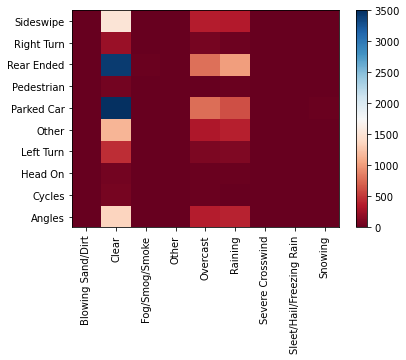

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2, cmap='RdBu')

#label names
row_labels = grouped_pivot2.columns.levels[1]
col_labels = grouped_pivot2.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


The graph plotted above shows number of property damages at weather conditions and different collision types.

So we see that most of collisions(in this case sevserity of collision is 1) occure at clear weather and with Rear ended and parked car collision types.

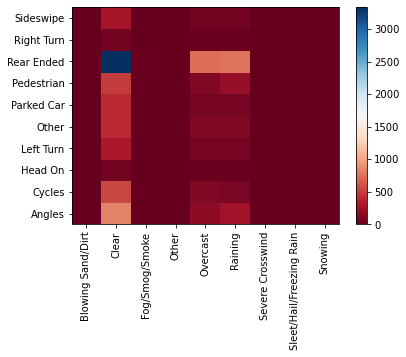

In [20]:
df4=df.loc[df['SEVERITYCODE']==2,['WEATHER','COLLISIONTYPE','SEVERITYCODE']]

grouped_test4 = df4.groupby(['COLLISIONTYPE','WEATHER'],as_index=False).count()
grouped_pivot3 = grouped_test4.pivot(index='COLLISIONTYPE',columns='WEATHER')
grouped_pivot3 = grouped_pivot3.fillna(0) #fill missing values with 0
grouped_pivot3
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot3, cmap='RdBu')

#label names
row_labels = grouped_pivot3.columns.levels[1]
col_labels = grouped_pivot3.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot3.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot3.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The graph plotted above shows number of injuries at weather conditions and different collision types.

So we see that most of collisions(in this case sevserity of collision is 2) occure at clear weather and with Rear ended collision type.

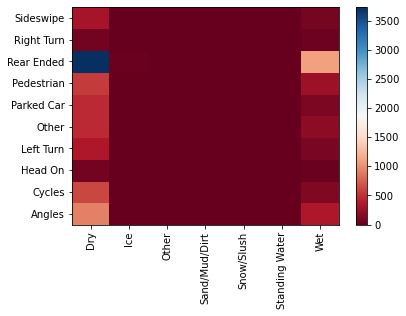

In [23]:
df5=df.loc[df['SEVERITYCODE']==2,['ROADCOND','COLLISIONTYPE','SEVERITYCODE']]

grouped_test5 = df5.groupby(['COLLISIONTYPE','ROADCOND'],as_index=False).count()
grouped_pivot4 = grouped_test5.pivot(index='COLLISIONTYPE',columns='ROADCOND')
grouped_pivot4 = grouped_pivot4.fillna(0) #fill missing values with 0
grouped_pivot4
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot4, cmap='RdBu')

#label names
row_labels = grouped_pivot4.columns.levels[1]
col_labels = grouped_pivot4.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot4.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot4.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

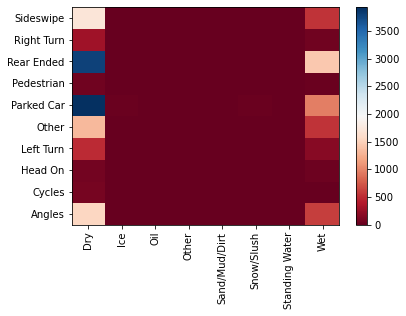

In [24]:
df6=df.loc[df['SEVERITYCODE']==1,['ROADCOND','COLLISIONTYPE','SEVERITYCODE']]

grouped_test6 = df6.groupby(['COLLISIONTYPE','ROADCOND'],as_index=False).count()
grouped_pivot5 = grouped_test6.pivot(index='COLLISIONTYPE',columns='ROADCOND')
grouped_pivot5 =grouped_pivot5.fillna(0) #fill missing values with 0
grouped_pivot5
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot5, cmap='RdBu')

#label names
row_labels = grouped_pivot5.columns.levels[1]
col_labels = grouped_pivot5.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot5.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot5.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The graph plotted above shows number of property damages at road conditions and different collision types.

We see that most of collisions(in this case sevserity of collision is 1) occure on dry road and with Rear ended, parked car collision types.

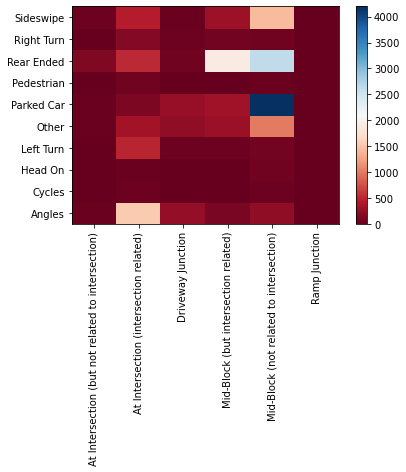

In [25]:
df7=df.loc[df['SEVERITYCODE']==1,['JUNCTIONTYPE','COLLISIONTYPE','SEVERITYCODE']]

grouped_test7 = df7.groupby(['COLLISIONTYPE','JUNCTIONTYPE'],as_index=False).count()
grouped_pivot6 = grouped_test7.pivot(index='COLLISIONTYPE',columns='JUNCTIONTYPE')
grouped_pivot6 = grouped_pivot6.fillna(0) #fill missing values with 0
grouped_pivot6
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot6, cmap='RdBu')

#label names
row_labels = grouped_pivot6.columns.levels[1]
col_labels = grouped_pivot6.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot6.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot6.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The graph plotted above shows number of property damages from different collision types on different junction types.

We see that most of collisions(in this case sevserity of collision is 1) occure on mid-block and not related to intersection and with parked cars.

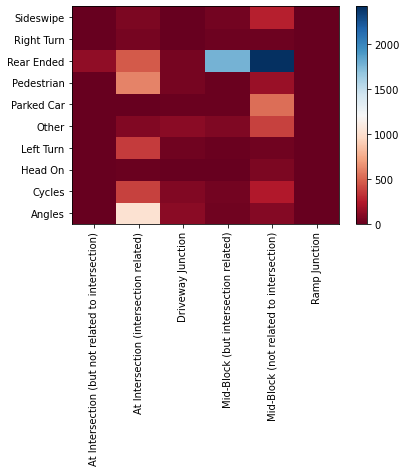

In [7]:
df8=df.loc[df['SEVERITYCODE']==2,['JUNCTIONTYPE','COLLISIONTYPE','SEVERITYCODE']]

grouped_test8 = df8.groupby(['COLLISIONTYPE','JUNCTIONTYPE'],as_index=False).count()
grouped_pivot7 = grouped_test8.pivot(index='COLLISIONTYPE',columns='JUNCTIONTYPE')
grouped_pivot7 = grouped_pivot7.fillna(0) #fill missing values with 0
grouped_pivot7
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot7, cmap='RdBu')

#label names
row_labels = grouped_pivot7.columns.levels[1]
col_labels = grouped_pivot7.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot7.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot7.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The graph plotted above shows number of injuries from different collision types on different junction types.

We see that most of collisions(in this case sevserity of collision is 2) occure on mid-block and not related to intersection and with rare ended collision type.

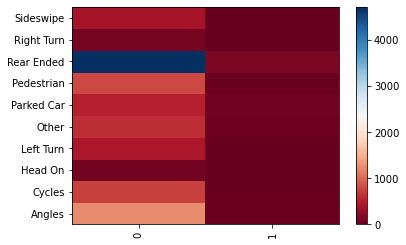

In [6]:
df9=df.loc[df['SEVERITYCODE']==2,['UNDERINFL','COLLISIONTYPE','SEVERITYCODE']]

grouped_test9 = df9.groupby(['COLLISIONTYPE','UNDERINFL'],as_index=False).count()
grouped_pivot8 = grouped_test9.pivot(index='COLLISIONTYPE',columns='UNDERINFL')
grouped_pivot8 = grouped_pivot8.fillna(0) #fill missing values with 0
grouped_pivot8
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot8, cmap='RdBu')

#label names
row_labels = grouped_pivot8.columns.levels[1]
col_labels = grouped_pivot8.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot8.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot8.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The graph plotted above shows number of injuries from different collision types in conditions of influence of drugs or alcohol.

We see that most of collisions(in this case sevserity of collision is 2) occure without influence of drugs or alcohol and  with rear
ended collision type.

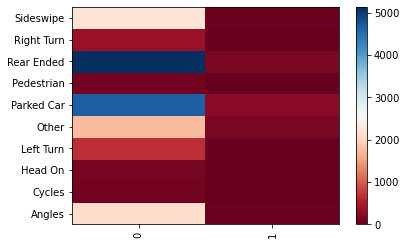

In [7]:
df10=df.loc[df['SEVERITYCODE']==1,['UNDERINFL','COLLISIONTYPE','SEVERITYCODE']]

grouped_test10 = df10.groupby(['COLLISIONTYPE','UNDERINFL'],as_index=False).count()
grouped_pivot9 = grouped_test10.pivot(index='COLLISIONTYPE',columns='UNDERINFL')
grouped_pivot9 = grouped_pivot9.fillna(0) #fill missing values with 0
grouped_pivot9
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot9, cmap='RdBu')

#label names
row_labels = grouped_pivot9.columns.levels[1]
col_labels = grouped_pivot9.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot9.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot9.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The graph plotted above shows number of property damage from different collision types in conditions of influence of drugs or alcohol.

We see that most of collisions(in this case sevserity of collision is 1) occure without influence of drugs or alcohol and  with rear ended and  parked car collision types.

Now we transforme date and time of a collision to 'day of weeks' form to see collisions by days.

In [8]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df['weekend'] =df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

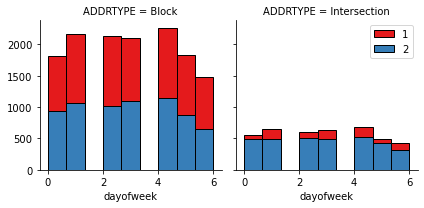

In [9]:
import seaborn as sns
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col='ADDRTYPE', hue='SEVERITYCODE', palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

As we see that the number of collisions occured on blocks exceeds collisions occured on intersections by more than two times and number of all collisions reduces on the weekend and increases on 5-th week day. On intersections most of collisions occure with injuries, while on blocks such severe collisions happen in 50% of cases.

Now we consider correlation between variables.
We'll start from categorical variables. Our target is severity code and it's categorical variable. Such attributes as address, collision type, weather, light and road conditions are also categorical. To determine correlation between two categorical values we use the Chi-Squared Test. This statistical test shows whether the output variable is dependent or independent of the input variables. The Chi-Squared test does this for a contingency table. A table summarization of two categorical variables with one variable corresponding to columns and another variable corresponding to rows. Each cell in the table corresponds to the count or frequency of observations that correspond to the row and column categories. Such table is called a contingency table.

So now we import necessary tables and create contingency tables for attributes: ADDRTYPE, COLLISIONTYPE, JUNCTIONTYPE, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, HITPARKEDCAR.

In [5]:
from scipy.stats import chisquare,chi2_contingency,chi2

from scipy import stats

In [11]:
dfa=df[['ADDRTYPE','SEVERITYCODE']]
var1=pd.get_dummies(dfa['ADDRTYPE'])
var1
dfa.groupby(by='ADDRTYPE')
dfa=pd.concat([dfa,var1],axis=1)
dfa.drop(columns=['ADDRTYPE'], axis=1, inplace=True)
dfa
dfa.set_index(['SEVERITYCODE'],inplace=True)
dfa=dfa.groupby(by='SEVERITYCODE').sum()
dfa

,Block,Intersection
SEVERITYCODE,,
1,13808.0,4053.0
2,6798.0,3249.0


In [12]:
stat, p, dof, expected = chi2_contingency(dfa)
print('stat:',stat, 'p=%.3f'%(p), 'dof:',dof,'expected:',expected)

stat: 309.2000520954351 p=0.000 dof: 1 expected: [[13187.75139745  4673.24860255]
 [ 7418.24860255  2628.75139745]]


P-value is close to 0. It means the variables have strong correlation. We can also interpret the p-value by comparing it to a chosen significance level, which would be 5%, calculated by inverting the 95% probability used in the critical value interpretation

In [13]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
    

Dependent (reject H0)


In [14]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [61]:
dfa=df[['COLLISIONTYPE','SEVERITYCODE']]
var1=pd.get_dummies(dfa['COLLISIONTYPE'])
var1
dfa.groupby(by='COLLISIONTYPE')
dfa=pd.concat([dfa,var1],axis=1)
dfa.drop(columns=['COLLISIONTYPE'], axis=1, inplace=True)
dfa
dfa.set_index(['SEVERITYCODE'],inplace=True)
dfa=dfa.groupby(by='SEVERITYCODE').sum()
dfa

,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
SEVERITYCODE,,,,,,,,,,
1,2161.0,93.0,118.0,676.0,1900.0,4930.0,89.0,5275.0,356.0,2263.0
2,1283.0,755.0,97.0,450.0,679.0,579.0,841.0,4861.0,104.0,398.0


In [62]:
stat, p, dof, expected = chi2_contingency(dfa)
print('stat:',stat, 'p=%.3f'%(p), 'dof:',dof,'expected:',expected)

stat: 5083.323428275698 p=0.000 dof: 9 expected: [[2204.14519134  542.71635373  137.59907553  720.63515838 1650.54891071
  3525.73631217  595.19600115 6486.9964168   294.39802207 1703.02855812]
 [1239.85480866  305.28364627   77.40092447  405.36484162  928.45108929
  1983.26368783  334.80399885 3649.0035832   165.60197793  957.97144188]]


In [63]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [15]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [64]:
dfa=df[['JUNCTIONTYPE','SEVERITYCODE']]
var1=pd.get_dummies(dfa['JUNCTIONTYPE'])
var1
dfa.groupby(by='JUNCTIONTYPE')
dfa=pd.concat([dfa,var1],axis=1)
dfa.drop(columns=['JUNCTIONTYPE'], axis=1, inplace=True)
dfa
dfa.set_index(['SEVERITYCODE'],inplace=True)
dfa=dfa.groupby(by='SEVERITYCODE').sum()
dfa

,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
SEVERITYCODE,,,,,,
1,249.0,3802.0,959.0,3064.0,9761.0,26.0
2,165.0,3084.0,481.0,2054.0,4250.0,13.0


In [65]:
stat, p, dof, expected = chi2_contingency(dfa)
print('stat:',stat, 'p=%.3f'%(p), 'dof:',dof,'expected:',expected)

stat: 470.9586279842718 p=0.000 dof: 5 expected: [[ 264.95821987 4407.01039129  921.59380823 3275.49799341 8966.97975491
    24.95983231]
 [ 149.04178013 2478.98960871  518.40619177 1842.50200659 5044.02024509
    14.04016769]]


In [66]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [19]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [16]:
dfa=df[['UNDERINFL','SEVERITYCODE']]
var1=pd.get_dummies(dfa['UNDERINFL'])
var1
dfa.groupby(by='UNDERINFL')
dfa=pd.concat([dfa,var1],axis=1)
dfa.drop(columns=['UNDERINFL'], axis=1, inplace=True)
dfa
dfa.set_index(['SEVERITYCODE'],inplace=True)
dfa=dfa.groupby(by='SEVERITYCODE').sum()
dfa

,0,1
SEVERITYCODE,,
1,17237.0,624.0
2,9693.0,354.0


In [17]:
stat, p, dof, expected = chi2_contingency(dfa)
print('stat:',stat, 'p=%.3f'%(p), 'dof:',dof,'expected:',expected)

stat: 0.009218693154918257 p=0.924 dof: 1 expected: [[17235.08420525   625.91579475]
 [ 9694.91579475   352.08420525]]


In [18]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [19]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [20]:
dfa=df[['WEATHER','SEVERITYCODE']]
var1=pd.get_dummies(dfa['WEATHER'])
var1
dfa.groupby(by='WEATHER')
dfa=pd.concat([dfa,var1],axis=1)
dfa.drop(columns=['WEATHER'], axis=1, inplace=True)
dfa
dfa.set_index(['SEVERITYCODE'],inplace=True)
dfa=dfa.groupby(by='SEVERITYCODE').sum()
dfa

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
SEVERITYCODE,,,,,,,,,
1,4.0,11850.0,66.0,16.0,2883.0,2997.0,3.0,6.0,36.0
2,1.0,6809.0,33.0,7.0,1530.0,1650.0,1.0,2.0,14.0


In [25]:
stat, p, dof, expected = chi2_contingency(dfa)
print('stat:',stat, 'p=%.3f'%(p), 'dof:',dof,'expected:',expected)

stat: 93.98777715521774 p=0.000 dof: 9 expected: [[2.87666267e+01 7.08267799e+04 3.57910356e+02 1.60557917e+02
  1.75155307e+04 3.34495659e+00 2.09829127e+04 1.60557917e+01
  7.35890451e+01 5.42551960e+02]
 [1.42333733e+01 3.50442201e+04 1.77089644e+02 7.94420835e+01
  8.66646929e+03 1.65504341e+00 1.03820873e+04 7.94420835e+00
  3.64109549e+01 2.68448040e+02]]


In [26]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [27]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [71]:
dfa=df[['ROADCOND','SEVERITYCODE']]
var1=pd.get_dummies(dfa['ROADCOND'])
var1
dfa.groupby(by='ROADCOND')
dfa=pd.concat([dfa,var1],axis=1)
dfa.drop(columns=['ROADCOND'], axis=1, inplace=True)
dfa
dfa.set_index(['SEVERITYCODE'],inplace=True)
dfa=dfa.groupby(by='SEVERITYCODE').sum()
dfa

,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
SEVERITYCODE,,,,,,,,
1,13335.0,42.0,2.0,8.0,1.0,51.0,11.0,4411.0
2,7597.0,30.0,0.0,2.0,1.0,13.0,4.0,2400.0


In [30]:
stat, p, dof, expected = chi2_contingency(dfa)
print('stat:',stat, 'p=%.3f'%(p), 'dof:',dof,'expected:',expected)

stat: 132.30822196710005 p=0.000 dof: 7 expected: [[7.91349831e+04 7.11806763e+02 3.14425920e+01 6.55611492e+01
  3.74635139e+01 5.53924812e+02 6.35541753e+01 2.99092639e+04]
 [3.91550169e+04 3.52193237e+02 1.55574080e+01 3.24388508e+01
  1.85364861e+01 2.74075188e+02 3.14458247e+01 1.47987361e+04]]


In [33]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [21]:
dfa=df[['LIGHTCOND','SEVERITYCODE']]
var1=pd.get_dummies(dfa['LIGHTCOND'])
var1
dfa.groupby(by='LIGHTCOND')
dfa=pd.concat([dfa,var1],axis=1)
dfa.drop(columns=['LIGHTCOND'], axis=1, inplace=True)
dfa
dfa.set_index(['SEVERITYCODE'],inplace=True)
dfa=dfa.groupby(by='SEVERITYCODE').sum()
dfa

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,Other
SEVERITYCODE,,,,,,,
1,114.0,113.0,3902.0,240.0,12987.0,495.0,10.0
2,51.0,54.0,2084.0,150.0,7376.0,328.0,4.0


In [22]:
stat, p, dof, expected = chi2_contingency(dfa)
print('stat:',stat, 'p=%.3f'%(p), 'dof:',dof,'expected:',expected)

stat: 13.585326931988234 p=0.035 dof: 6 expected: [[1.05599291e+02 1.06879282e+02 3.83101426e+03 2.49598323e+02
  1.30322324e+04 5.26716461e+02 8.95993980e+00]
 [5.94007095e+01 6.01207181e+01 2.15498574e+03 1.40401677e+02
  7.33076756e+03 2.96283539e+02 5.04006020e+00]]


In [23]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [24]:
dfa=df[['HITPARKEDCAR','SEVERITYCODE']]
var1=pd.get_dummies(dfa['HITPARKEDCAR'])
var1
dfa.groupby(by='HITPARKEDCAR')
dfa=pd.concat([dfa,var1],axis=1)
dfa.drop(columns=['HITPARKEDCAR'], axis=1, inplace=True)
dfa
dfa.set_index(['SEVERITYCODE'],inplace=True)
dfa=dfa.groupby(by='SEVERITYCODE').sum()
dfa

,0,1
SEVERITYCODE,,
1,16991.0,870.0
2,9952.0,95.0


In [25]:
stat, p, dof, expected = chi2_contingency(dfa)
print('stat:',stat, 'p=%.3f'%(p), 'dof:',dof,'expected:',expected)

stat: 295.6251294061817 p=0.000 dof: 1 expected: [[17243.40414935   617.59585065]
 [ 9699.59585065   347.40414935]]


In [26]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


If one variable continuous and the second is categorical we use ANOVA test

In [78]:
dfa=df[['PERSONCOUNT','SEVERITYCODE']]
f_val, p_val = stats.f_oneway(dfa['PERSONCOUNT'][dfa['SEVERITYCODE']==1],dfa['PERSONCOUNT'][dfa['SEVERITYCODE']==2]) 
 
print( "ANOVA results: F=", f_val, ", P =%.3f"% (p_val)) 

ANOVA results: F= 335.52735961817433 , P =0.000


In [79]:
dfa=df[['PEDCOUNT','SEVERITYCODE']]
f_val, p_val = stats.f_oneway(dfa['PEDCOUNT'][dfa['SEVERITYCODE']==1],dfa['PEDCOUNT'][dfa['SEVERITYCODE']==2]) 
 
print( "ANOVA results: F=", f_val, ", P =%.3f"% (p_val)) 

ANOVA results: F= 1304.4953133542165 , P =0.000


In [80]:
dfa=df[['PEDCYLCOUNT','SEVERITYCODE']]
f_val, p_val = stats.f_oneway(dfa['PEDCYLCOUNT'][dfa['SEVERITYCODE']==1],dfa['PEDCYLCOUNT'][dfa['SEVERITYCODE']==2]) 
 
print( "ANOVA results: F=", f_val, ", P =%.3f"% (p_val)) 

ANOVA results: F= 1120.0477100172632 , P =0.000


In [81]:
dfa=df[['VEHCOUNT','SEVERITYCODE']]
f_val, p_val = stats.f_oneway(dfa['VEHCOUNT'][dfa['SEVERITYCODE']==1],dfa['VEHCOUNT'][dfa['SEVERITYCODE']==2]) 
 
print( "ANOVA results: F=", f_val, ", P =%.3f"% (p_val)) 

ANOVA results: F= 16.183293935372106 , P =0.000


All ANOVA test have p-value close to 0 that means strong correlation if variables.

Now taking into account variables correlation let's choose features for mashine learning model. The target is severity code. Features are 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'LIGHTCOND', 'ROADCOND', 'HITPARKEDCAR', 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'.

In [5]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [6]:
feature_df= df[['ADDRTYPE','COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'LIGHTCOND', 'ROADCOND', 'HITPARKEDCAR', 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]

feature_df.head()
feature_df = pd.get_dummies(feature_df, columns=['ADDRTYPE','COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'LIGHTCOND', 'ROADCOND'])

feature_df.head()
X = np.asarray(feature_df, order='C')
X= preprocessing.StandardScaler().fit(X).transform(X)

X[0:5]

y = np.asarray(df['SEVERITYCODE'], order='C')
y [0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([1, 2, 1, 1, 2])

We spleet dataset on X_train, X_test, y_train, y_test sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (19535, 47) (19535,)
Test set: (8373, 47) (8373,)


Fisrt we train support vector mashine

In [18]:
from sklearn import svm
import pickle

In [19]:

clf = svm.SVC(kernel='rbf', probability=True)


In [20]:
clff=clf.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
yhat = clff.predict(X_test)
yhat [0:5]

array([1, 1, 1, 2, 1])

Let's plot distribution of predicted test data and actual test data.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Severity code')
    plt.ylabel('Proportion of collisions')

    plt.show()
    plt.close()

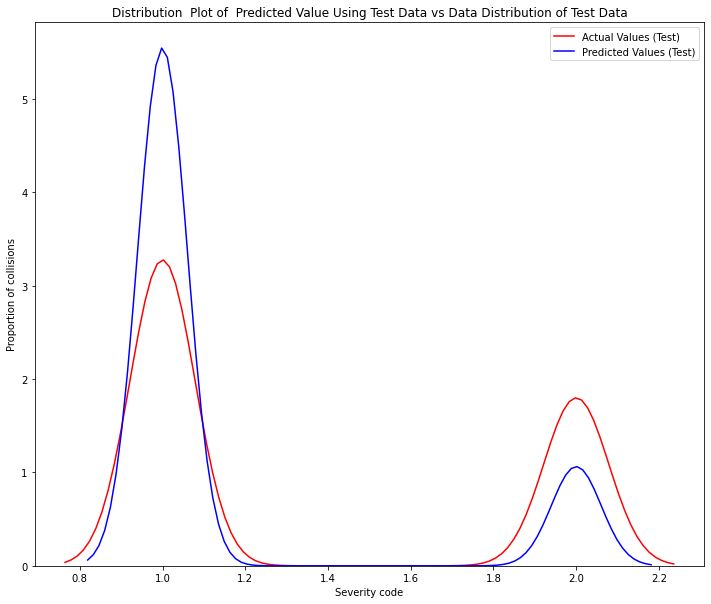

In [31]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat,"Actual Values (Test)","Predicted Values (Test)",Title)

Looks not bad.

Now we try to predict probability with the help of trained model SVM

In [22]:
prob = clff.predict_proba(X_test)


In [40]:
prob

array([[0.73, 0.27],
       [0.73, 0.27],
       [0.73, 0.27],
       ...,
       [0.67, 0.33],
       [0.71, 0.29],
       [0.63, 0.37]])

Also we need to calculate Receiver Operating Characteristic curve, or ROC curve and Area Under the Receiver Operating Characteristic Curve. ROC Curve - this is a tool that helps in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
auc1 = roc_auc_score(y_test, prob[:,0])
auc1

0.3005149906121666

In [25]:
fpr1, tpr1, thresholds1 = roc_curve(y_test,  prob[:,0], pos_label=1)
fpr1, tpr1, thresholds1

(array([0.00000000e+00, 3.36927224e-04, 3.36927224e-04, ...,
        9.98989218e-01, 9.99326146e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 1.85013876e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.84931056, 0.84931056, 0.81499317, ..., 0.11525913, 0.11491496,
        0.11356648]))

In [ ]:
Now we compute log loss of probability prediction

In [24]:
from sklearn.metrics import log_loss
log_loss(y_test, prob)

0.5858905635749717

The next step is evaluation of the model

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.71      0.93      0.81      5405
           2       0.71      0.32      0.44      2968

   micro avg       0.71      0.71      0.71      8373
   macro avg       0.71      0.62      0.62      8373
weighted avg       0.71      0.71      0.68      8373

Confusion matrix, without normalization
[[5012  393]
 [2015  953]]


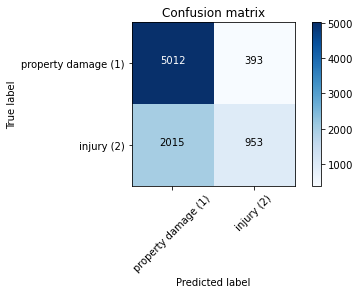

In [32]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['property damage (1)','injury (2)'],normalize= False,  title='Confusion matrix')

We calculated confusion matrix. Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate precision and recall of each class.

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

In [33]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6771049142996226

In [34]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7124089334766511

The Jaccard similarity index measures the similarity between two sets of data. So we see that the SVM model has average accuracy (f1=0.62) and predicted collisions severity is close to real values (J=0.69)

Now we fit and predict collision severity with the help of Logistic regression. Also we use this algorithm to calculate collision probability at certain conditions.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
yhat1 = LR.predict(X_test)
yhat1

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
unique_elements, counts_elements = np.unique(yhat1, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   1    2]
 [6996 1377]]


Let's plot distribution of predicted test data and actual test data.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Severity code')
    plt.ylabel('Proportion')

    plt.show()
    plt.close()

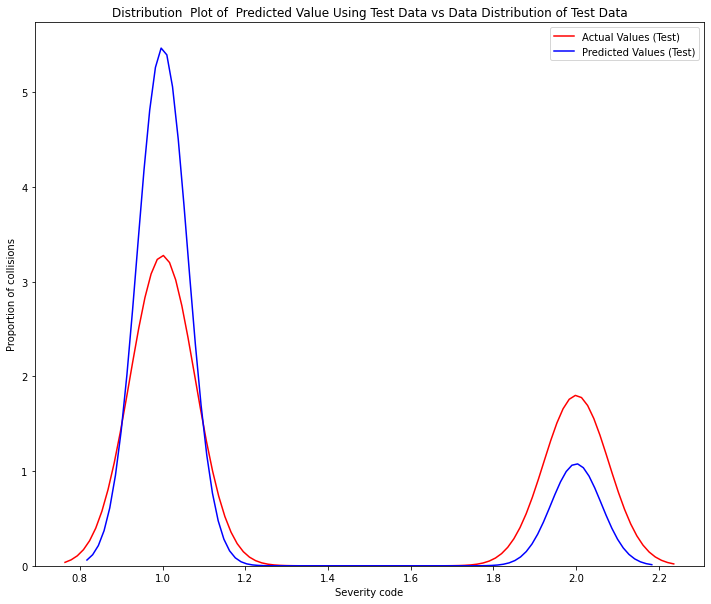

In [66]:

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat1,"Actual Values (Test)","Predicted Values (Test)",Title)

looks not bad

We see that the number of collisions with property damage is much more than the nuber of collisions with injuries

Below is probability prediction for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)

In [28]:
yhat1_prob = LR.predict_proba(X_test)
yhat1_prob

array([[0.56264819, 0.43735181],
       [0.88239819, 0.11760181],
       [0.915322  , 0.084678  ],
       ...,
       [0.59585406, 0.40414594],
       [0.59562333, 0.40437667],
       [0.53691195, 0.46308805]])

Also we need to calculate Receiver Operating Characteristic curve, or ROC curve and Area Under the Receiver Operating Characteristic Curve. ROC Curve - this is a tool that helps in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems

In [29]:
auc2 = roc_auc_score(y_test, yhat1_prob[:,0])
auc2

0.23969414114414375

In [30]:
fpr2, tpr2, thresholds2 = roc_curve(y_test,  yhat1_prob[:,0], pos_label=1)
fpr2, tpr2, thresholds2

(array([0.00000000e+00, 3.36927224e-04, 6.73854447e-04, ...,
        9.96967655e-01, 9.97641509e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.99979761, 0.99979761, 0.98806595, ..., 0.0198357 , 0.01857044,
        0.00318255]))

In [31]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat1)

0.7118117759464947

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[4994  411]
 [2002  966]]
              precision    recall  f1-score   support

           1       0.71      0.92      0.81      5405
           2       0.70      0.33      0.44      2968

   micro avg       0.71      0.71      0.71      8373
   macro avg       0.71      0.62      0.63      8373
weighted avg       0.71      0.71      0.68      8373



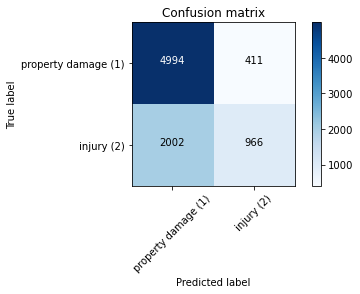

In [69]:
cnf_matrix = confusion_matrix(y_test, yhat1, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['property damage (1)','injury (2)'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat1))

Below is a log loss evaluation, it measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [70]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat1_prob)

0.5388185070938475

Let's consider Decision Tree model and evaluate it

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
colTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
colTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
colTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
predTree = colTree.predict(X_test)
predTree

array([1, 1, 1, ..., 1, 1, 1])

Also we need to calculate Receiver Operating Characteristic curve, or ROC curve and Area Under the Receiver Operating Characteristic Curve. ROC Curve - this is a tool that helps in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems

In [36]:
prob1 = colTree.predict_proba(X_test)

In [43]:
prob1[:,1].mean()

0.36033233522422403

In [37]:
auc3 = roc_auc_score(y_test, prob1[:,0])
auc3

0.27492843802907857

In [38]:
fpr3, tpr3, thresholds3 = roc_curve(y_test,  prob1[:,0], pos_label=1)
fpr3, tpr3, thresholds3

(array([0.        , 0.        , 0.00202156, 0.02425876, 0.02560647,
        0.05525606, 0.05559299, 0.35208895, 0.35343666, 0.83827493,
        0.90801887, 0.99764151, 1.        ]),
 array([0.00000000e+00, 3.70027752e-04, 2.94172063e-02, 1.96854764e-01,
        2.09065680e-01, 2.78445883e-01, 2.78445883e-01, 6.93802035e-01,
        6.95652174e-01, 9.90934320e-01, 9.95189639e-01, 9.99444958e-01,
        1.00000000e+00]),
 array([2.        , 1.        , 0.95918367, 0.92182558, 0.91366906,
        0.81142857, 0.75      , 0.71181595, 0.63636364, 0.51868566,
        0.11      , 0.10122699, 0.        ]))

In [44]:
from sklearn.metrics import log_loss
log_loss(y_test, prob1)

0.5656326996384069

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6970022691986146


Confusion matrix, without normalization
[[5356   49]
 [2488  480]]
              precision    recall  f1-score   support

           1       0.68      0.99      0.81      5405
           2       0.91      0.16      0.27      2968

   micro avg       0.70      0.70      0.70      8373
   macro avg       0.80      0.58      0.54      8373
weighted avg       0.76      0.70      0.62      8373



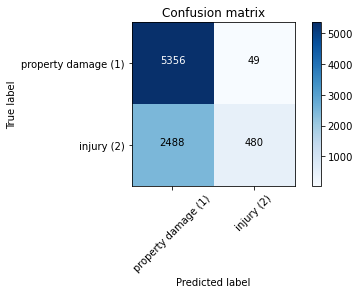

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['property damage (1)','injury (2)'],normalize= False,  title='Confusion matrix')
#print(confusion_matrix(y_test, predTree))
print(classification_report(y_test, predTree))

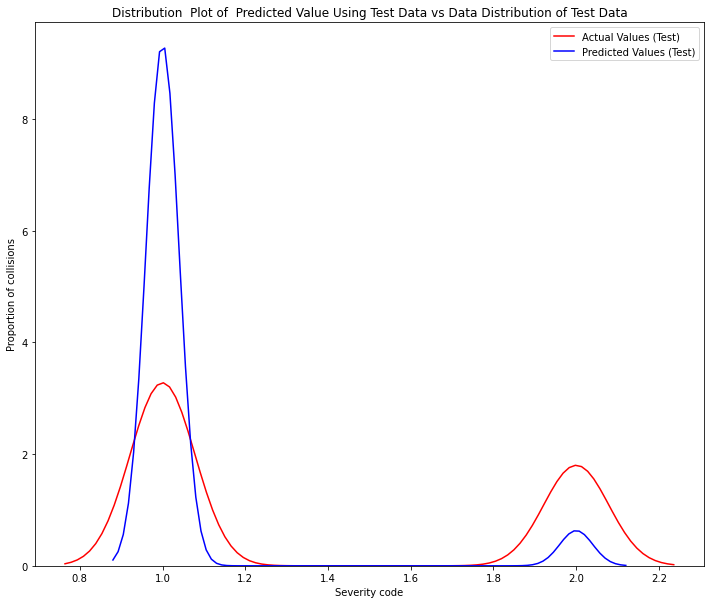

In [93]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predTree,"Actual Values (Test)","Predicted Values (Test)",Title)

Looks not so good as previous ML models

In [94]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predTree)

0.6970022691986146

The average accuracy of the model is 0.62 and similarity index is 0.69

Below is visualization of the model

In [32]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [130]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - pydotplus


The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhd1c1de3_3

The following packages will be UPDATED:

  openssl                                 1.1.1g-h516909a_0 --> 1.1.1g-h516909a_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - python-graphviz


The f

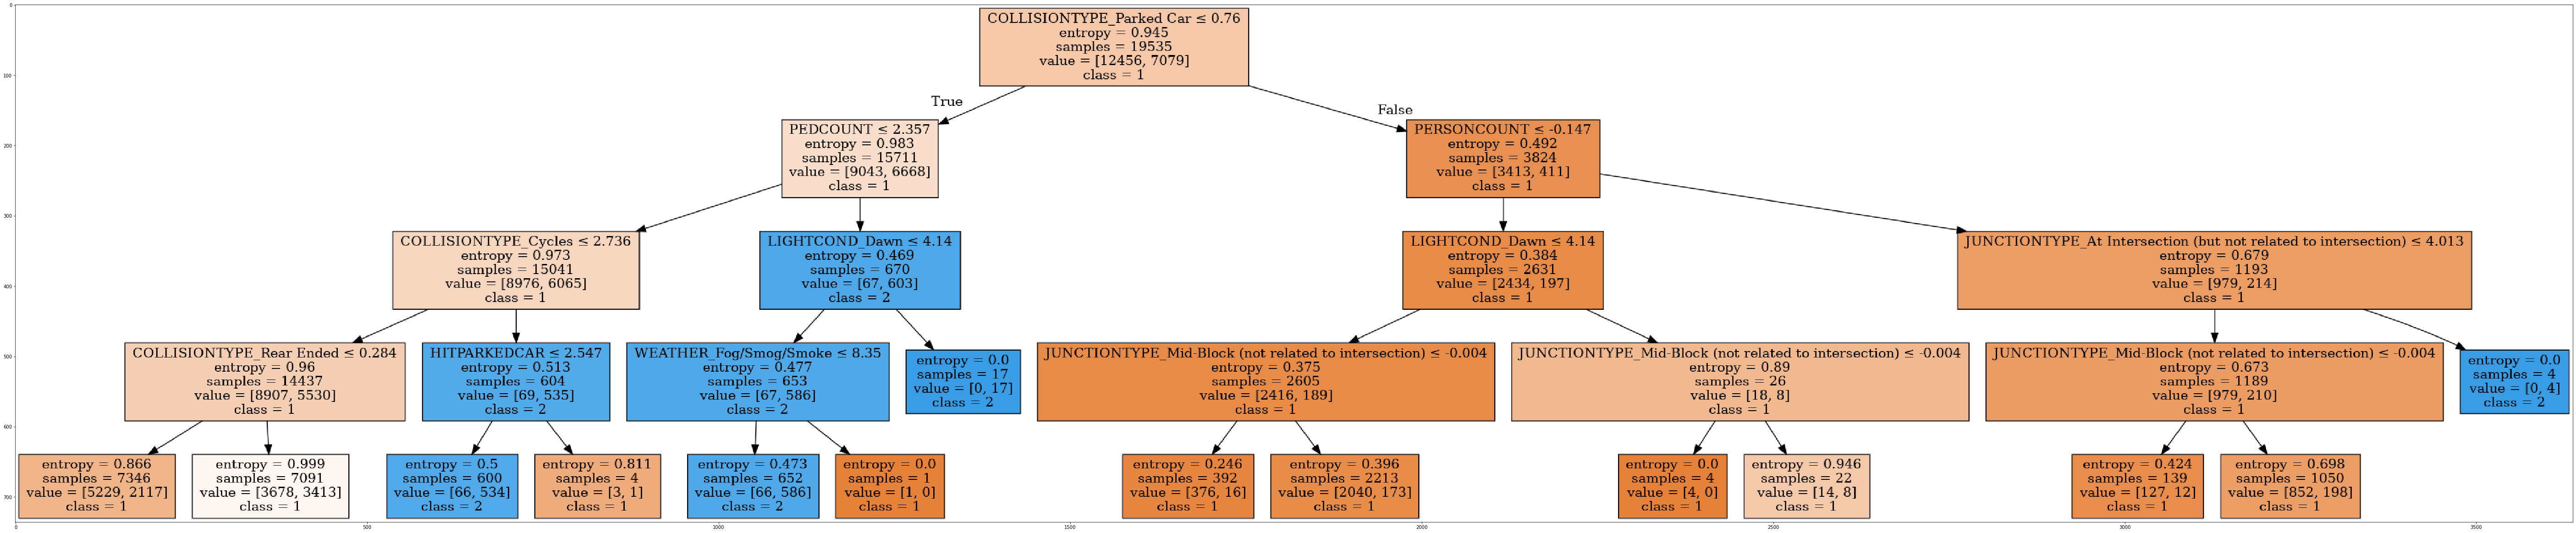

In [33]:
dot_data = StringIO()
filename = "colTree.png"
#featureNames = feature_df.columns[0:1240]
targetNames = df['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(colTree,feature_names=list(feature_df.columns.values), out_file=dot_data, class_names=np.unique(y_train.astype(np.str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


And the las model is K-nearest neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat2=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat2)

    
    std_acc[n-1]=np.std(yhat2==y_test)/np.sqrt(yhat2.shape[0])

mean_acc

array([0.65591783, 0.68302878, 0.66463633, 0.68888093, 0.6728771 ,
       0.68720889, 0.68446196, 0.69473307, 0.68350651, 0.69365819,
       0.69234444, 0.69222501, 0.69210558, 0.69437478])

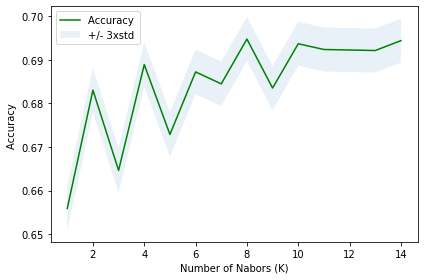

In [10]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [11]:
k = 8

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6947330705840201 with k= 8


In [12]:
yhat2=neigh.predict(X_test)
yhat2

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
from sklearn.metrics import jaccard_similarity_score,f1_score

In [16]:
KNNJ=round(jaccard_similarity_score(y_test, yhat2),2) #KNN
KNNJ

0.69

In [17]:
KNNF1=round(f1_score(y_test, yhat2, average='weighted'),2)
KNNF1#KNN

0.67

Confusion matrix, without normalization
[[4827  578]
 [1978  990]]
              precision    recall  f1-score   support

           1       0.71      0.89      0.79      5405
           2       0.63      0.33      0.44      2968

   micro avg       0.69      0.69      0.69      8373
   macro avg       0.67      0.61      0.61      8373
weighted avg       0.68      0.69      0.67      8373



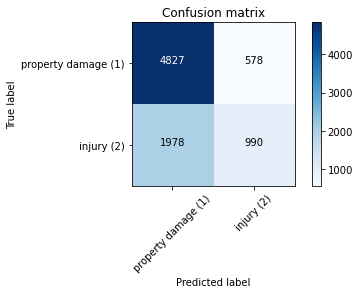

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['property damage (1)','injury (2)'],normalize= False,  title='Confusion matrix')
#print(confusion_matrix(y_test, predTree))
print(classification_report(y_test, yhat2))

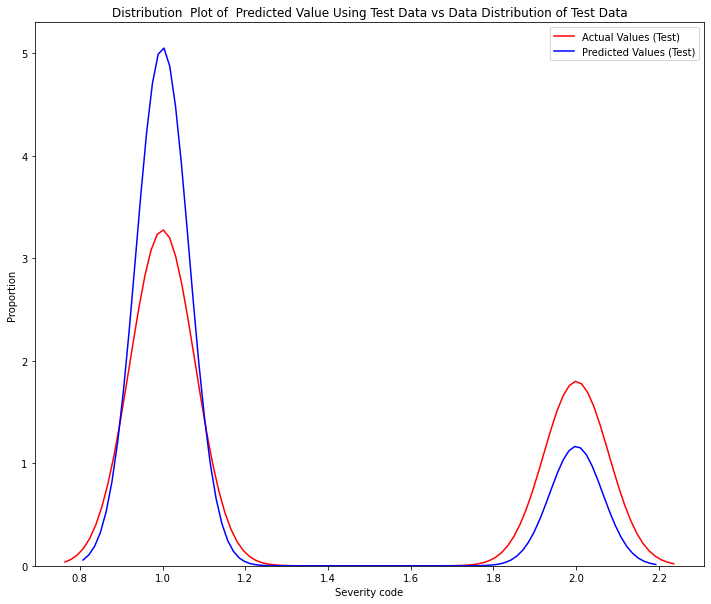

In [25]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat2,"Actual Values (Test)","Predicted Values (Test)",Title)

looks good

As shown above the model average accuracy is 0.67 and similarity index is 0.69

In [13]:
prob2 =neigh.predict_proba(X_test)[:,0]


In [46]:
prob2[:,0].mean()

0.6594559894900275

In [28]:
from sklearn.metrics import log_loss
log_loss(y_test, prob2)

1.7734313376921715

Also we need to calculate Receiver Operating Characteristic curve, or ROC curve and Area Under the Receiver Operating Characteristic Curve. ROC Curve - this is a tool that helps in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [15]:
#fpr, tpr, thresholds = roc_curve(y_test,  prob2)
auc = roc_auc_score(y_test, prob2)
auc

0.2925083094170068

In [16]:
fpr, tpr, thresholds = roc_curve(y_test,  prob2, pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.09838275, 0.17250674, 0.27291105, 0.46933962,
        0.66644205, 0.76819407, 0.8402965 , 0.94474394, 1.        ]),
 array([0.        , 0.20462535, 0.4506938 , 0.61480111, 0.76096207,
        0.89306198, 0.946716  , 0.98094357, 0.99648474, 1.        ]),
 array([2.   , 1.   , 0.875, 0.75 , 0.625, 0.5  , 0.375, 0.25 , 0.125,
        0.   ]))

Now to plot ROC curve graph we combile all results calculations in data frame

In [39]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table = result_table.append({'classifiers':'SVM',
                                        'fpr':fpr1, 
                                        'tpr':tpr1, 
                                        'auc':auc1},ignore_index=True)
result_table = result_table.append({'classifiers':'LR','fpr':fpr2,'tpr':tpr2,'auc':auc2},ignore_index=True)    
result_table = result_table.append({'classifiers':'DecisionTree','fpr':fpr3,'tpr':tpr3,'auc':auc3},ignore_index=True)
result_table = result_table.append({'classifiers':'KNearestNeighbors','fpr':fpr,'tpr':tpr,'auc':auc},ignore_index=True)
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc
classifiers,,,
SVM,"[0.0, 0.00033692722371967657, 0.00033692722371...","[0.0, 0.0, 0.00018501387604070305, 0.000555041...",0.300515
LR,"[0.0, 0.00033692722371967657, 0.00067385444743...","[0.0, 0.0, 0.0, 0.0014801110083256244, 0.00185...",0.239694
DecisionTree,"[0.0, 0.0, 0.0020215633423180594, 0.0242587601...","[0.0, 0.0003700277520814061, 0.029417206290471...",0.274928
KNearestNeighbors,"[0.0, 0.09838274932614555, 0.1725067385444744,...","[0.0, 0.20462534690101758, 0.45069380203515264...",0.292508


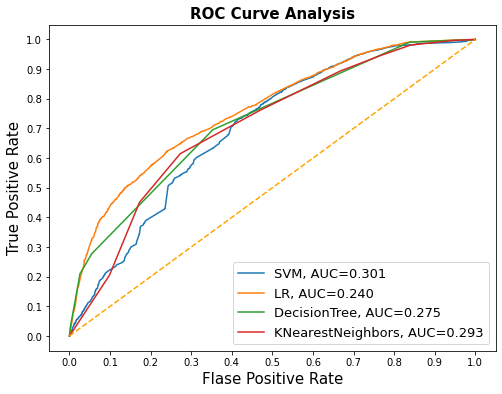

In [40]:
fig = plt.figure(figsize=(8,6))
#for j in result_table:
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

As we see the most accurate model for probability prediction is LR

## Results and Discussion <a name="results"></a>

Our analysis shows that our data is nonlinear and categorical, so clastering algorithms are the most appropriate for mashine learning. Majority of all collisions occure on mid-blocks at daylight, clear weather and dry road conditions. The number of collisions inreases on the 5-th week day and decrease on weekend. Severe collisions (injuries, severity code=2) prevail on intersections, while on blocks collisions with injuries take half of all collisions. Generally rear ended collisions and collisions with parked car are predominate. Most of collisions don't involve pedestrians and bycicles and the number collisions with property damage is almost by three times more than collisions with injuries. As analysis shows all collisions occured due to inattention.

We used SVM, Logistic regression, Decision Tree, K-nearest neighbors methods to predict collisions severity and probability of colliosion severity under certain conditions. After evaluation mashine learning model we see that the most accurate model is Logistic regression for both purposes for severety and probability prediction.

As a result of all this we found a model to predict severity and probality of collisions. Purpose of this analysis was to provide info about collisions severity, compare diffrent attributes and can be considered as a starting point for more detailed analysis which could eventually result in detection collisions severity and probability which has not only observations listed above but also other factors taken into account and all other relevant conditions met.



## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify collisions in Seattle sity WA USA in order to aid transportation and logistics companies, people who travel by car, taxi drivers, ordinary car drivers in reducing risk of collisions, property damage and people death. By comparing attributes: collision address type, type of collisions, weather, road and light conditions. Also we explored count of people, bisycles and vehicles involved in collisions, then generated mashine learning models to be used as starting points for final exploration by stakeholders.
